# Как в ggplot2 работает geom_qq()

### Подготовка

In [1]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
head(iris, 3)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa


### Квантили данных против квантилей теоретического распределения

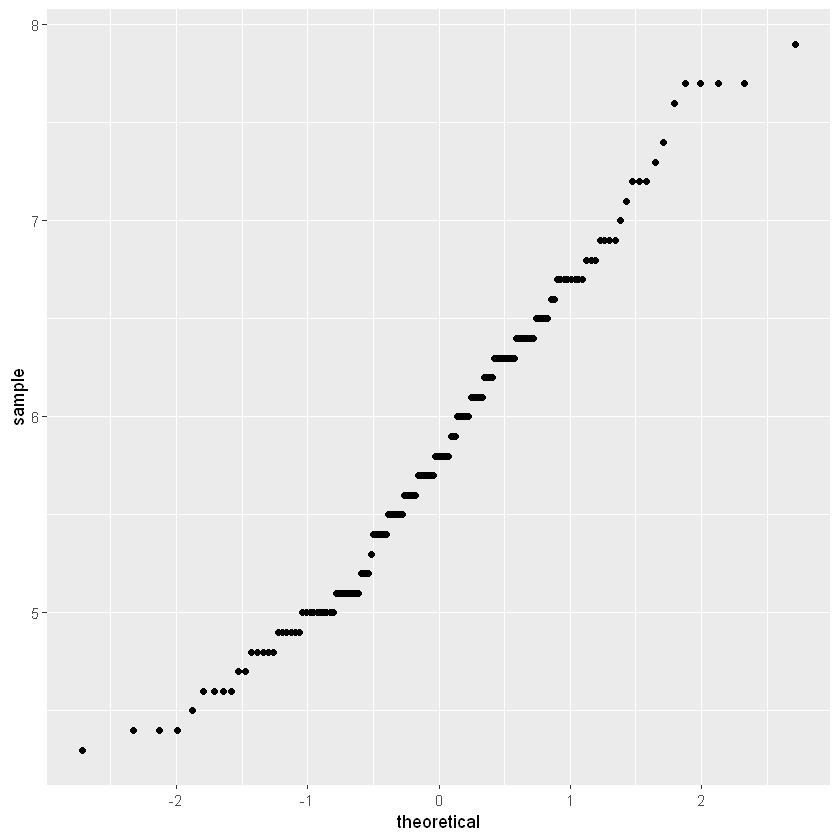

In [3]:
ggplot(iris, aes(sample = Sepal.Length)) + geom_qq()

### Квантили двух столбцов данных

##### Ожидание: как оно должно работать (имитация в `geom_point()`)

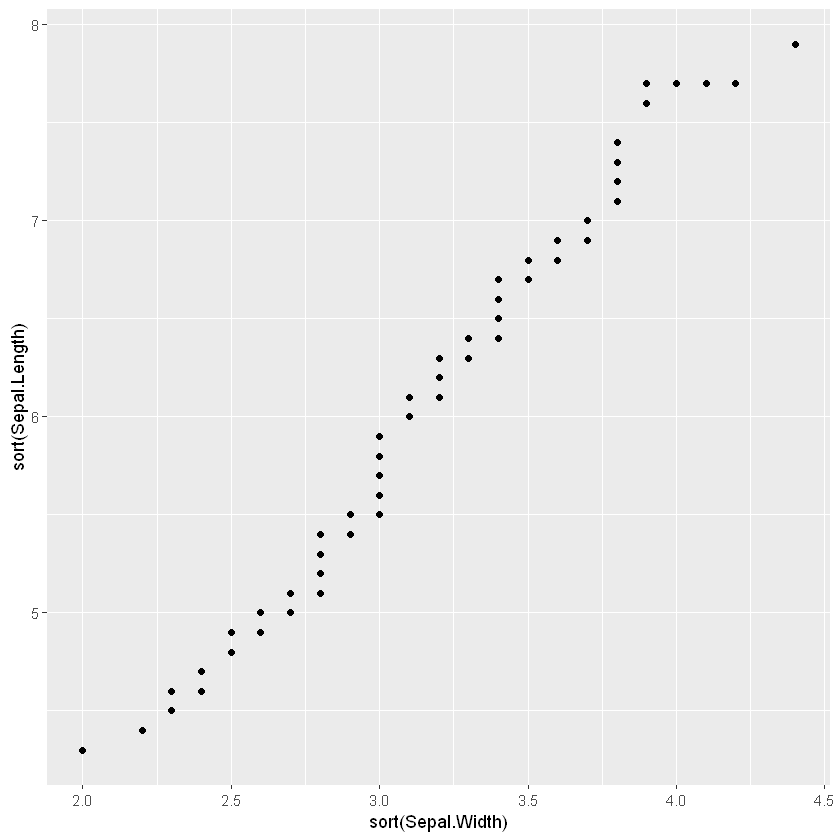

In [4]:
ggplot(iris, aes(x = sort(Sepal.Width), y = sort(Sepal.Length))) + geom_point()

##### Попытка №1.

ERROR while rich displaying an object: Error: geom_point requires the following missing aesthetics: x

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)


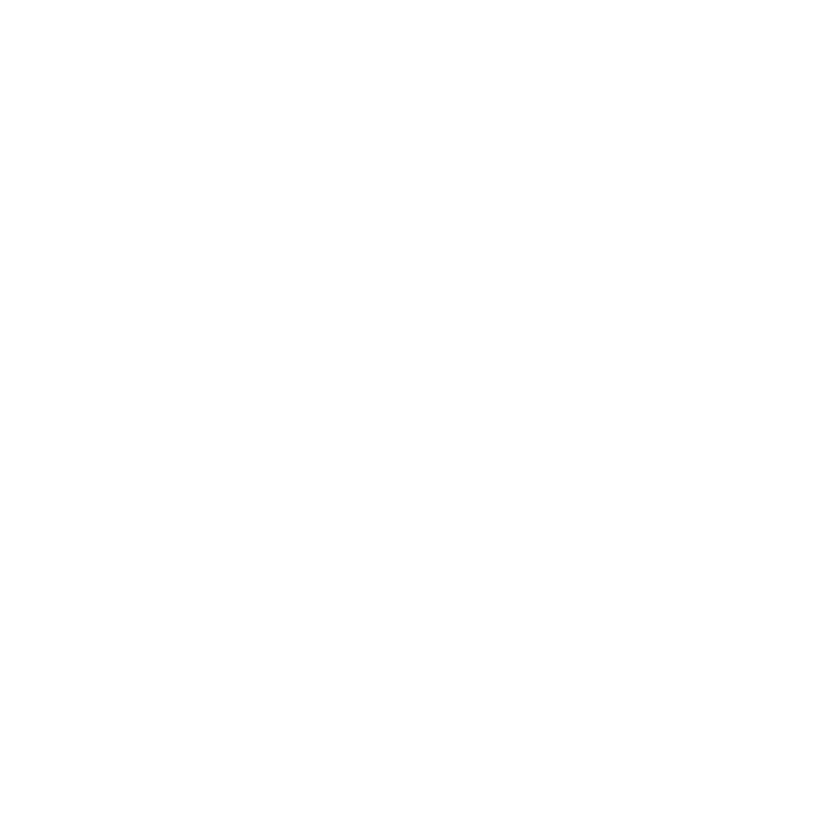

In [5]:
ggplot(iris) + geom_qq(aes(x = Sepal.Width, sample = Sepal.Length))

##### Попытка №2.

ERROR while rich displaying an object: Error: stat_qq requires the following missing aesthetics: sample

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj

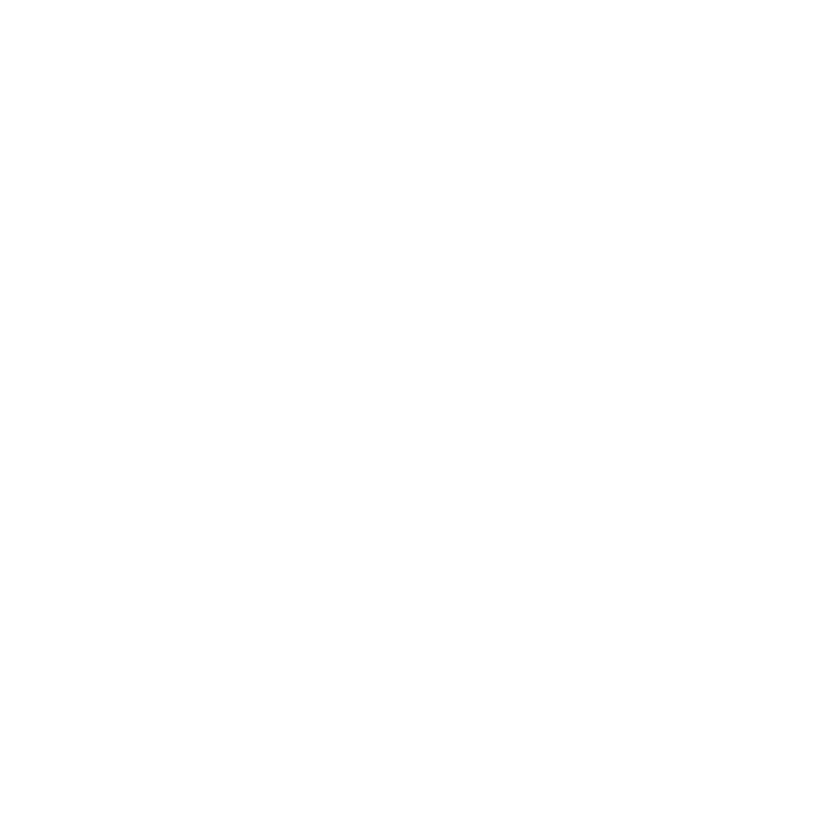

In [6]:
ggplot(iris) + geom_qq(aes(x = Sepal.Width, y = Sepal.Length))

##### Попытка №3.

ERROR while rich displaying an object: Error: geom_point requires the following missing aesthetics: x, y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(ob

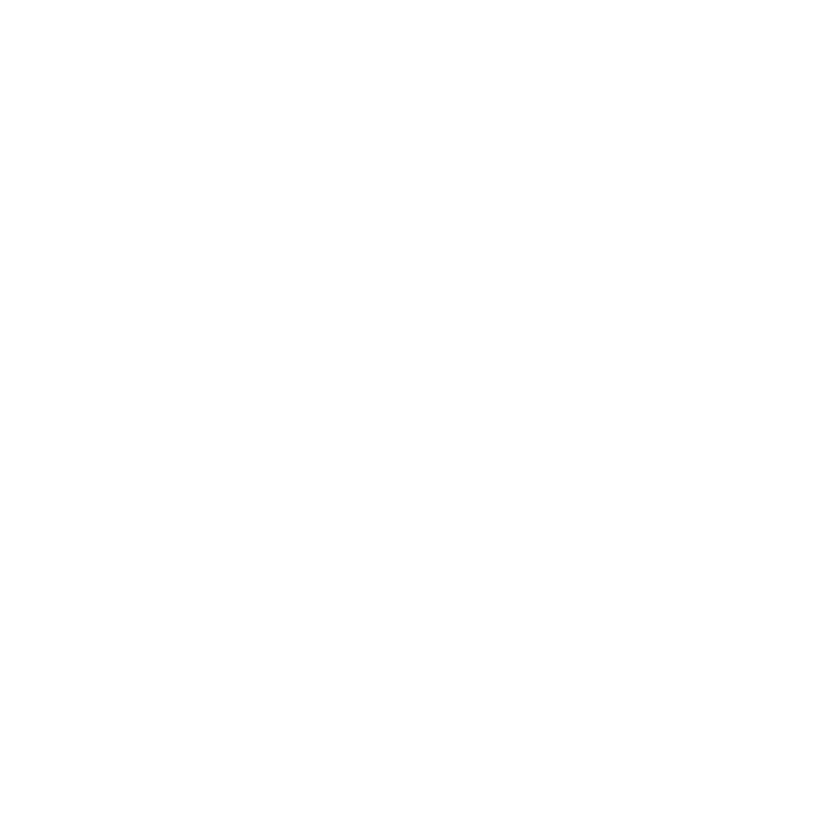

In [7]:
ggplot(iris) + geom_qq(aes(x = Sepal.Width, y = Sepal.Length, sample = Sepal.Length))

### Вычисляемые переменные

In [8]:
p <- ggplot(iris, aes(sample = Sepal.Length)) + geom_qq()
p_df <- as.data.frame(ggplot_build(p)$data)
p_df

x,y,sample,theoretical,PANEL,group,shape,colour,size,fill,alpha,stroke
-2.7130519,4.3,4.3,-2.7130519,1,-1,19,black,1.5,NA,NA,0.5
-2.3263479,4.4,4.4,-2.3263479,1,-1,19,black,1.5,NA,NA,0.5
-2.1280452,4.4,4.4,-2.1280452,1,-1,19,black,1.5,NA,NA,0.5
-1.9893130,4.4,4.4,-1.9893130,1,-1,19,black,1.5,NA,NA,0.5
-1.8807936,4.5,4.5,-1.8807936,1,-1,19,black,1.5,NA,NA,0.5
-1.7907506,4.6,4.6,-1.7907506,1,-1,19,black,1.5,NA,NA,0.5
-1.7132494,4.6,4.6,-1.7132494,1,-1,19,black,1.5,NA,NA,0.5
-1.6448536,4.6,4.6,-1.6448536,1,-1,19,black,1.5,NA,NA,0.5
-1.5833868,4.6,4.6,-1.5833868,1,-1,19,black,1.5,NA,NA,0.5
-1.5273795,4.7,4.7,-1.5273795,1,-1,19,black,1.5,NA,NA,0.5


### Альтернативные геометрии

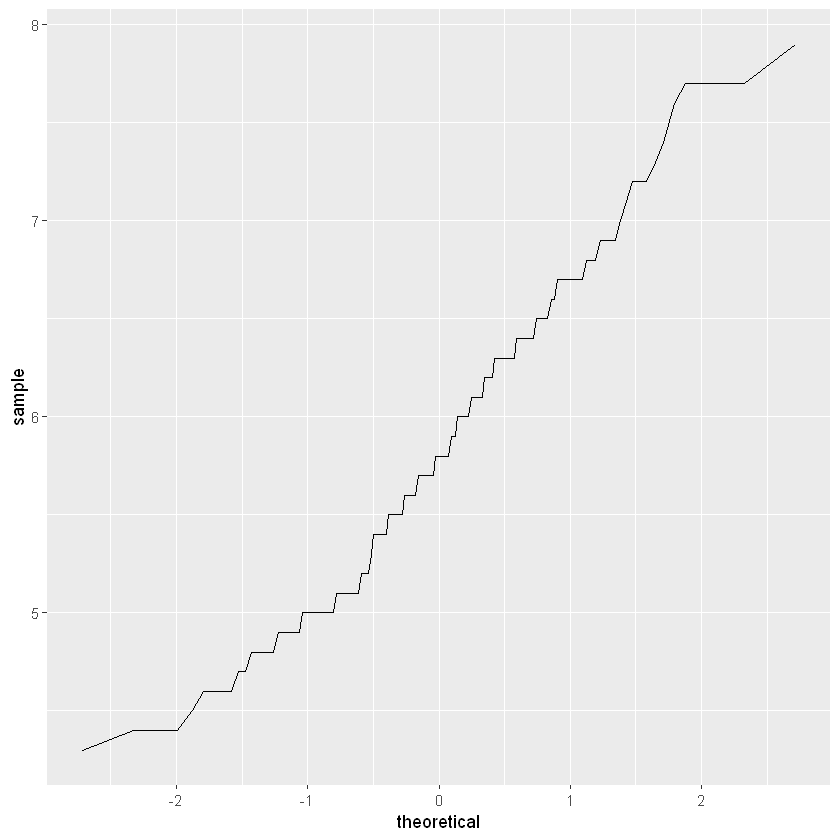

In [9]:
ggplot(iris, aes(sample = Sepal.Length)) + geom_qq(geom = "line")

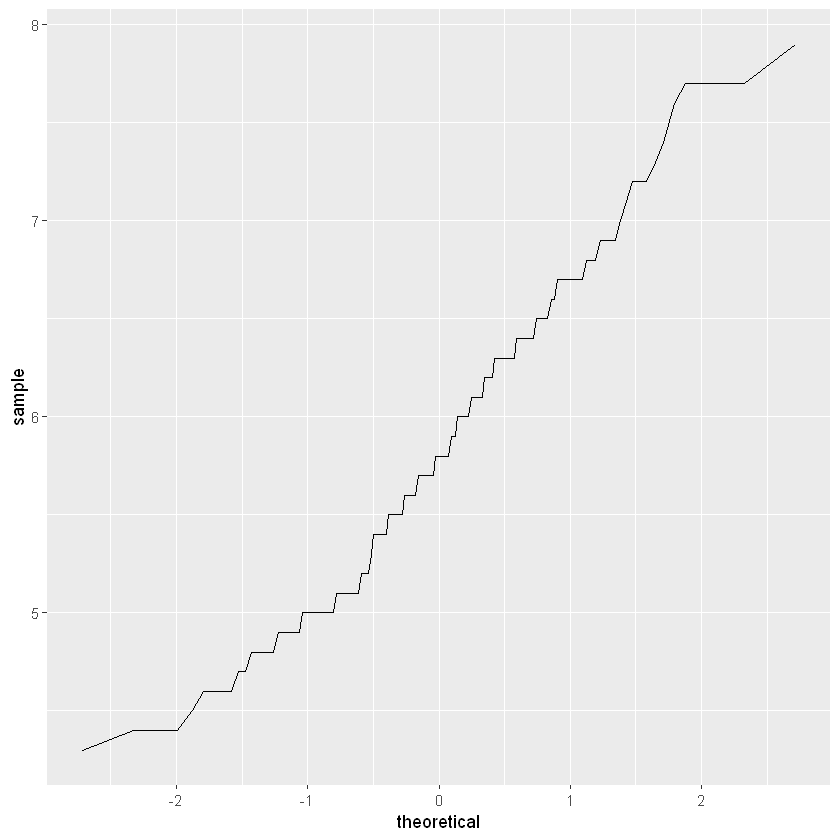

In [10]:
ggplot(iris, aes(sample = Sepal.Length)) + stat_qq(geom = "line")

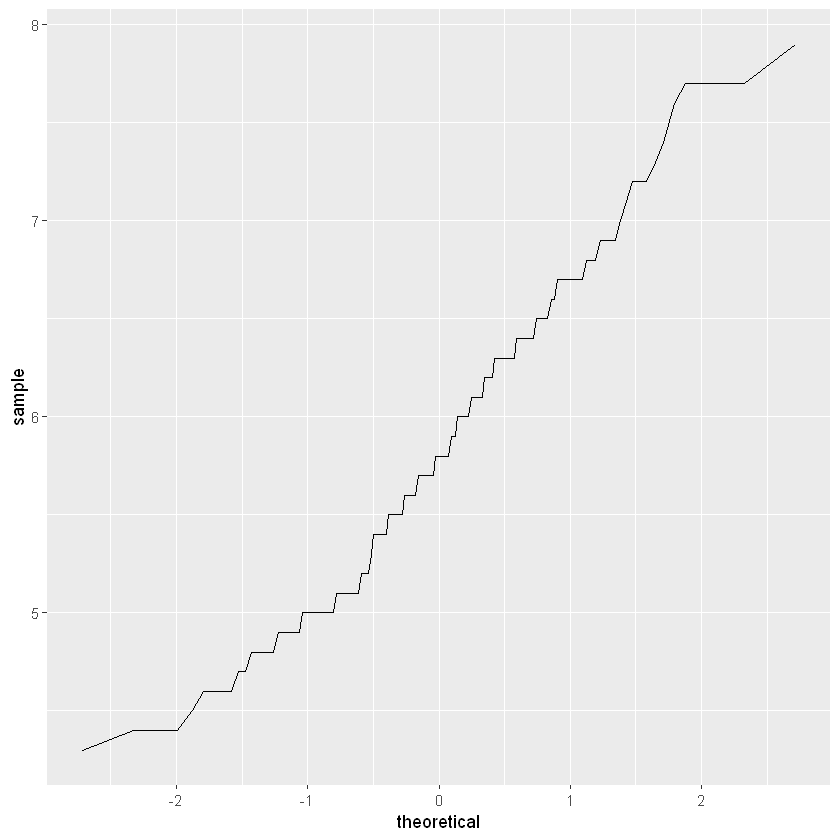

In [11]:
ggplot(iris, aes(sample = Sepal.Length)) + geom_line(stat = "qq")